## **Social Dataset Preparation**

- **Source:** Scapped Dataset
The dataset contains the post of many industries filtered specifically for restaurants.

- **Dataset Shape:** 88516 rowa, 40 columns
- The dataset is prepared using Mistral 8*7B for the columns "Goal"
- Steps include setting the prompt and converting the dataset to Mistral model input format

- The Dataset is Scalable

- The dataset can be used for Designer (Use Stable diffusion to generate Templates)  & Copywriting Agent


### Necassary Libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn swifter missingno logzero nltk tensorflow transformers keras torch gensim
!pip install --upgrade duckduckgo_search
!pip install --upgrade langchain
!pip install langchain-groq
!pip install wikipedia
!pip install python-dotenv

### Necessary Imports

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import missingno as mno
sns.set_style("darkgrid", {"grid.color": ".2", "grid.linestyle": ":"})
from groq import Groq
from google.colab import userdata
from langchain.agents import Tool
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
from google.colab import userdata
import pandas as pd
import ast
#Imports
GROQ_API_KEY=userdata.get('GROQ_API_KEY')
client = Groq(api_key=GROQ_API_KEY,)

### Loading the dataset
The dataset have two files
* data.txt
* Industry.txt

In [ ]:
chunksize = 5000
chunks = []
for chunk in pd.read_csv('/content/drive/MyDrive/Dataset/social media/data.txt', chunksize=chunksize):
    chunks.append(chunk)

chunksize = 5000
chunkindustry = []
for chunki in pd.read_csv('/content/drive/MyDrive/Dataset/social media/Industry (1).txt', chunksize=chunksize):
    chunkindustry.append(chunki)

In [ ]:
insta_df = pd.concat(chunks, ignore_index=True)
insta_df

,Unnamed: 0.1,Unnamed: 0,image_type,account,caption,profile_name,profile_image_link,biography,id,external_url,...,tags,confidence_score,accent_color,is_bw,dominant_colors,bg_color,fore_color,industry,_category,region
0,0,0,"['Ambiguous Clip', 'Not LineDraw']",yeastbakery,It’s our last Pizza Sunday at the arch today. ...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.620000e+18,http://www.yeastbakery.com/,...,"['text', 'font', 'graphics', 'screenshot', 'gr...","[0.9980798959732056, 0.9481294751167297, 0.881...","[0.788235294117647, 0.00784313725490196, 0.007...",0,"[1.0, 0.7529411764705882, 0.796078431372549]","[1.0, 0.7529411764705882, 0.796078431372549]","[1.0, 0.7529411764705882, 0.796078431372549]",hospitality,bakery,UK
1,1,1,"['Not Clip', 'Not LineDraw']",yeastbakery,New cakes on our counters 😋😋,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.790000e+18,http://www.yeastbakery.com/,...,"['dessert', 'baked goods', 'baking', 'snack', ...","[0.9897554516792297, 0.987897515296936, 0.9828...","[0.6901960784313725, 0.14901960784313725, 0.10...",0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.0, 0.0, 0.0]",hospitality,bakery,UK
2,2,2,"['Not Clip', 'Not LineDraw']",yeastbakery,🔺Opening Times for Half Term🔺: Hi everyone we ...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.690000e+18,http://www.yeastbakery.com/,...,"['food', 'fruit', 'baked goods', 'breakfast', ...","[0.9808361530303955, 0.9546540379524231, 0.947...","[0.6588235294117647, 0.4392156862745098, 0.141...",0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...",hospitality,bakery,UK
3,3,3,"['Not Clip', 'Not LineDraw']",yeastbakery,"New addition to our selection of sandwiches, o...",Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.670000e+18,http://www.yeastbakery.com/,...,"['food', 'bread', 'fast food', 'bun', 'america...","[0.9958561658859253, 0.981575608253479, 0.9799...","[0.24313725490196078, 0.12549019607843137, 0.0...",0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...",hospitality,bakery,UK
4,4,4,"['Ambiguous Clip', 'Not LineDraw']",yeastbakery,We are currently closed as we move into our ne...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.620000e+18,http://www.yeastbakery.com/,...,"['text', 'font', 'design', 'yellow', 'graphics...","[0.9993002414703369, 0.9640201926231384, 0.951...","[0.792156862745098, 0.7372549019607844, 0.0039...",0,"[1.0, 1.0, 0.0]","[1.0, 1.0, 0.0]","[1.0, 1.0, 0.0]",hospitality,bakery,UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88511,88511,88511,"['Not Clip', 'Not LineDraw']",sandysfishmongers,There’s only one turkey and the best place to ...,Fishmongers/ButchersTwickenham,https://scontent-lcy1-1.cdninstagram.com/v/t51...,"Local Family Fishmongers & Butchers , fresh fi...",2.700000e+18,http://sandysfish.net/,...,"['text', 'food', 'snack']","[0.9999812841415405, 0.9580191373825073, 0.915...","[0.6588235294117647, 0.00784313725490196, 0.71...",0,"[0.5019607843137255, 0.0, 0.5019607843137255]","[0.5019607843137255, 0.0, 0.5019607843137255]","[0.5019607843137255, 0.5019607843137255, 0.501...",retail,fishmongers / butchers,UK
88512,88512,88512,"['Not Clip', 'Not LineDraw']",sandysfishmongers,Day one brochure tour !! #sandysfishmongers #b...,Fishmongers/ButchersTwickenham,https://scontent-lcy1-1.cdninstagram.com/v/t51...,"Local Family Fishmongers & Butchers , fresh fi...",2.700000e+18,http://sandysfish.ne

In [ ]:
industry_df = pd.concat(chunkindustry, ignore_index=True)
industry_df

,ACCOUNT,INDUSTRY,SUB-CATEGORY,REGION
0,deepaestheticss,cosmetics,beauty clinic,UK
1,jossyaesthetics,cosmetics,beauty clinic,UK
2,kanpailondon,hospitality,brewery,UK
3,drjb.aesthetics,cosmetics,beauty clinic,UK
4,nataliefaccini.aesthetics,cosmetics,beauty clinic,UK
...,...,...,...,...
829,wigmoremedical,cosmetics,beauty clinic,UK
830,william.van.niekerk,cosmetics,beauty clinic,UK
831,zafnaqui,cosmetics,beauty clinic,UK
832,zahmal_beauty,cosmetics,beauty clinic,UK


In [ ]:
# data.drop(['Unnamed: 0'], axis = 1,inplace=True)
industry_df=industry_df.rename(columns={'ACCOUNT':'account'})
data=pd.merge(insta_df, industry_df, on=['account'], how='left')
data.head(10)

In [ ]:
data.shape

(88516, 40)

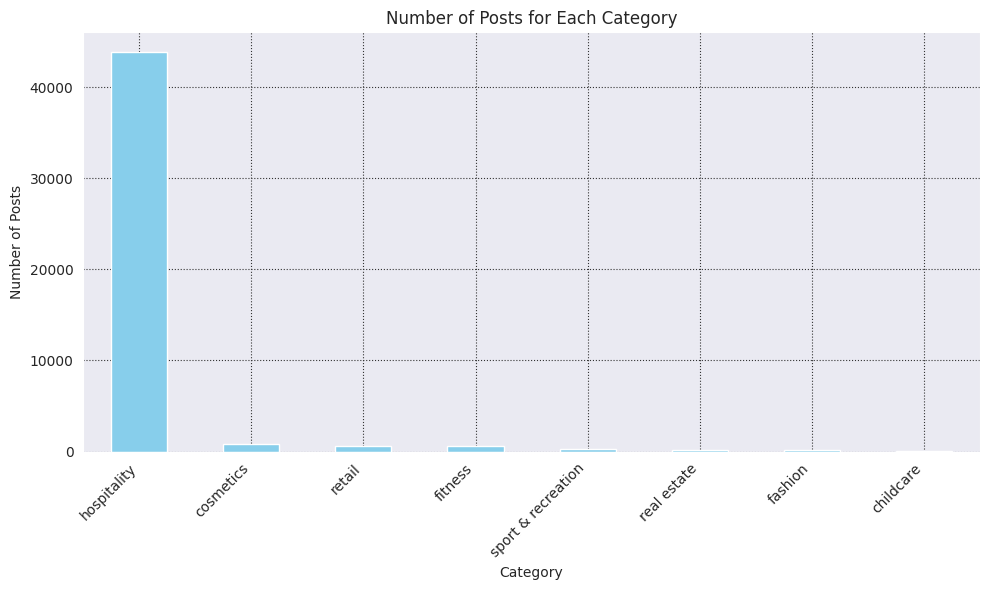

In [ ]:
import matplotlib.pyplot as plt

# Count the number of posts for each category
category_counts = data['INDUSTRY'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Posts for Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


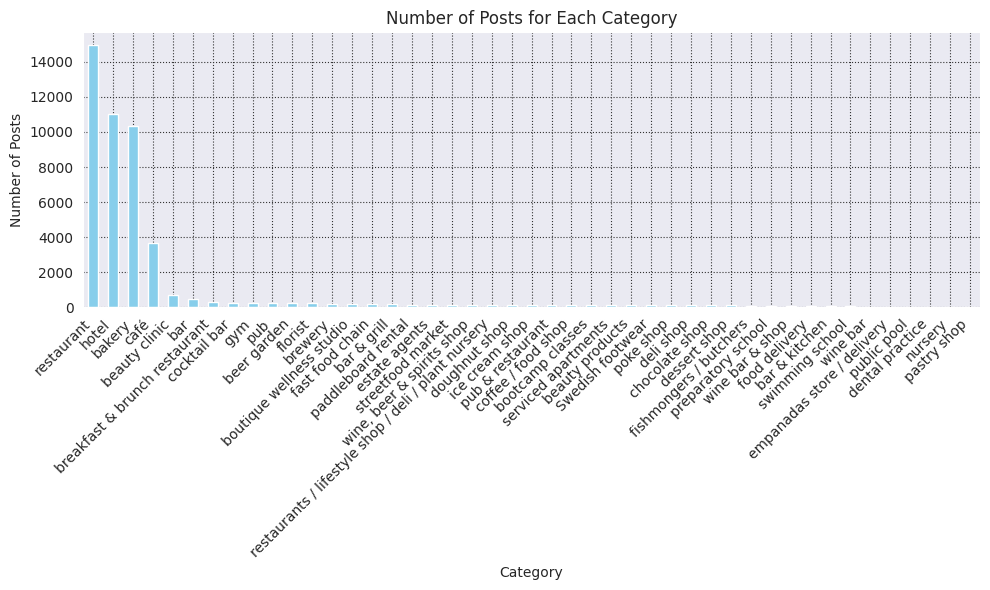

In [ ]:
import matplotlib.pyplot as plt

# Count the number of posts for each category
category_counts = data['SUB-CATEGORY'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Posts for Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Filter rows where category is 'hospitality'
hospitality_rows = data[data['INDUSTRY'] == 'hospitality']

# Print the filtered rows
hospitality_rows.head(10)

,Unnamed: 0.1,Unnamed: 0,image_type,account,caption,profile_name,profile_image_link,biography,id,external_url,...,is_bw,dominant_colors,bg_color,fore_color,industry,_category,region,INDUSTRY,SUB-CATEGORY,REGION
0,0,0,"['Ambiguous Clip', 'Not LineDraw']",yeastbakery,It’s our last Pizza Sunday at the arch today. ...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.620000e+18,http://www.yeastbakery.com/,...,0,"[1.0, 0.7529411764705882, 0.796078431372549]","[1.0, 0.7529411764705882, 0.796078431372549]","[1.0, 0.7529411764705882, 0.796078431372549]",hospitality,bakery,UK,hospitality,bakery,UK
1,1,1,"['Not Clip', 'Not LineDraw']",yeastbakery,New cakes on our counters 😋😋,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.790000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.0, 0.0, 0.0]",hospitality,bakery,UK,hospitality,bakery,UK
2,2,2,"['Not Clip', 'Not LineDraw']",yeastbakery,🔺Opening Times for Half Term🔺: Hi everyone we ...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.690000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...",hospitality,bakery,UK,hospitality,bakery,UK
3,3,3,"['Not Clip', 'Not LineDraw']",yeastbakery,"New addition to our selection of sandwiches, o...",Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.670000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...",hospitality,bakery,UK,hospitality,bakery,UK
4,4,4,"['Ambiguous Clip', 'Not LineDraw']",yeastbakery,We are currently closed as we move into our ne...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.620000e+18,http://www.yeastbakery.com/,...,0,"[1.0, 1.0, 0.0]","[1.0, 1.0, 0.0]","[1.0, 1.0, 0.0]",hospitality,bakery,UK,hospitality,bakery,UK
5,5,5,"['Not Clip', 'Not LineDraw']",yeastbakery,Weekend treats…\nIncluding the return of our “...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.770000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...",hospitality,bakery,UK,hospitality,bakery,UK
6,6,6,"['Not Clip', 'Not LineDraw']",yeastbakery,New vegan “Chocolate & Toasted Almond Cake wit...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.670000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.0, 0.0, 0.0]",hospitality,bakery,UK,hospitality,bakery,UK
7,7,7,"['Not Clip', 'Not LineDraw']",yeastbakery,Posted @withregram • @londoncoffeeshops Pastri...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.670000e+18,http://www.yeastbakery.com/,...,0,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]",hospitality,bakery,UK,hospitality,bakery,UK
8,8,8,"['Not Clip', 'Not LineDraw']",yeastbakery,We are looking for experienced part-time baris...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.650000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16.

In [ ]:
value_counts = data['SUB-CATEGORY'].value_counts()

print(value_counts)

SUB-CATEGORY
restaurant                                             14931
hotel                                                  11030
bakery                                                 10317
café                                                    3650
beauty clinic                                            687
bar                                                      506
breakfast & brunch restaurant                            319
cocktail bar                                             276
gym                                                      268
pub                                                      257
beer garden                                              245
florist                                                  233
brewery                                                  215
boutique wellness studio                                 200
fast food chain                                          200
bar & grill                                              196
paddleboard

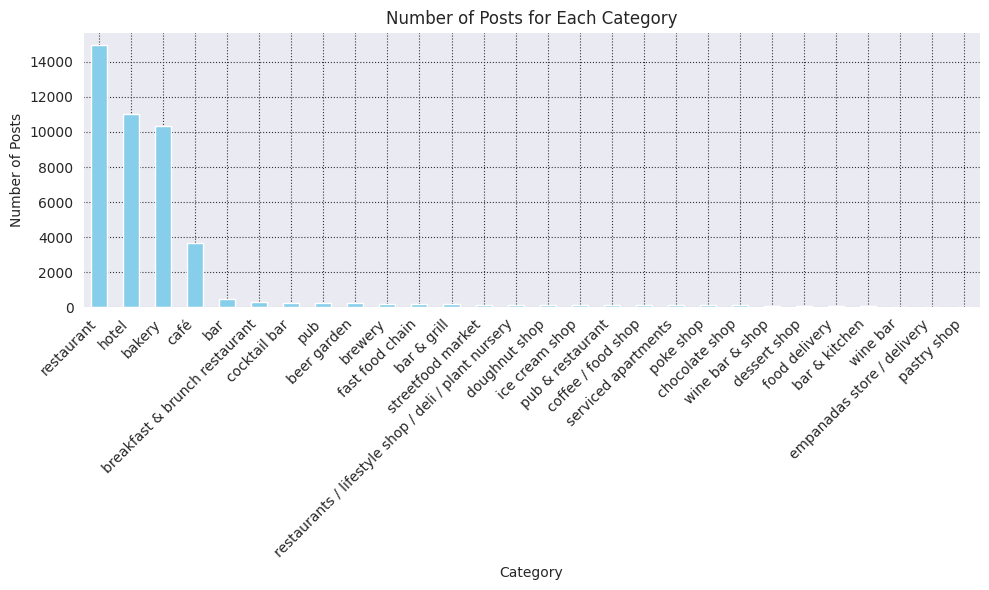

In [ ]:
import matplotlib.pyplot as plt

# Count the number of posts for each category
category_counts = hospitality_rows['SUB-CATEGORY'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Posts for Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Exclude sub-categories

In [ ]:
# List of subcategories to exclude
exclude_subcategories = ['hotel', 'beauty clinic', 'gym','florist','boutique wellness studio','paddleboard rental','estate agents','restaurants / lifestyle shop / deli / plant nursery','bootcamp classes','serviced apartments','beauty products','poke shop','fishmongers / butchers','preparatory school','swimming school','public pool','dental practice','nursery']  # Add more subcategories as needed

# Filter rows where category is 'hospitality' and sub-category is not in the exclusion list
restarurants = data[(~data['SUB-CATEGORY'].isin(exclude_subcategories))]

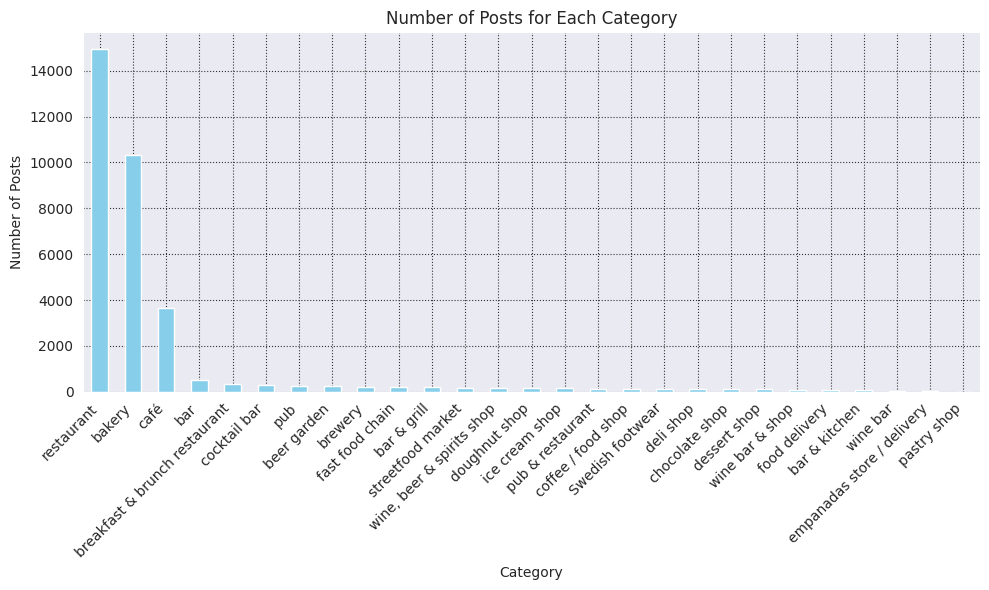

In [ ]:
import matplotlib.pyplot as plt

# Count the number of posts for each category
category_counts = restarurants['SUB-CATEGORY'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Posts for Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
restarurants.shape

(74734, 40)

In [ ]:
restarurants.head(10)

,Unnamed: 0.1,Unnamed: 0,image_type,account,caption,profile_name,profile_image_link,biography,id,external_url,...,is_bw,dominant_colors,bg_color,fore_color,industry,_category,region,INDUSTRY,SUB-CATEGORY,REGION
0,0,0,"['Ambiguous Clip', 'Not LineDraw']",yeastbakery,It’s our last Pizza Sunday at the arch today. ...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.620000e+18,http://www.yeastbakery.com/,...,0,"[1.0, 0.7529411764705882, 0.796078431372549]","[1.0, 0.7529411764705882, 0.796078431372549]","[1.0, 0.7529411764705882, 0.796078431372549]",hospitality,bakery,UK,hospitality,bakery,UK
1,1,1,"['Not Clip', 'Not LineDraw']",yeastbakery,New cakes on our counters 😋😋,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.790000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.0, 0.0, 0.0]",hospitality,bakery,UK,hospitality,bakery,UK
2,2,2,"['Not Clip', 'Not LineDraw']",yeastbakery,🔺Opening Times for Half Term🔺: Hi everyone we ...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.690000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...",hospitality,bakery,UK,hospitality,bakery,UK
3,3,3,"['Not Clip', 'Not LineDraw']",yeastbakery,"New addition to our selection of sandwiches, o...",Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.670000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...",hospitality,bakery,UK,hospitality,bakery,UK
4,4,4,"['Ambiguous Clip', 'Not LineDraw']",yeastbakery,We are currently closed as we move into our ne...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.620000e+18,http://www.yeastbakery.com/,...,0,"[1.0, 1.0, 0.0]","[1.0, 1.0, 0.0]","[1.0, 1.0, 0.0]",hospitality,bakery,UK,hospitality,bakery,UK
5,5,5,"['Not Clip', 'Not LineDraw']",yeastbakery,Weekend treats…\nIncluding the return of our “...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.770000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...",hospitality,bakery,UK,hospitality,bakery,UK
6,6,6,"['Not Clip', 'Not LineDraw']",yeastbakery,New vegan “Chocolate & Toasted Almond Cake wit...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.670000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.0, 0.0, 0.0]",hospitality,bakery,UK,hospitality,bakery,UK
7,7,7,"['Not Clip', 'Not LineDraw']",yeastbakery,Posted @withregram • @londoncoffeeshops Pastri...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.670000e+18,http://www.yeastbakery.com/,...,0,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]",hospitality,bakery,UK,hospitality,bakery,UK
8,8,8,"['Not Clip', 'Not LineDraw']",yeastbakery,We are looking for experienced part-time baris...,Yeast Bakery,https://instagram.fman2-1.fna.fbcdn.net/v/t51....,We are now open at our new site: Unit 1 Canal ...,2.650000e+18,http://www.yeastbakery.com/,...,0,"[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16...","[0.6470588235294118, 0.16470588235294117, 0.16.

### Remove irrelevant columns

In [ ]:
# List of columns to keep
columns_to_keep = ['caption', 'SUB-CATEGORY']

# Drop all columns except the ones to keep
df_filtered = restarurants[columns_to_keep]
df_filtered.head(20)

,caption,SUB-CATEGORY
0,It’s our last Pizza Sunday at the arch today. ...,bakery
1,New cakes on our counters 😋😋,bakery
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,bakery
3,"New addition to our selection of sandwiches, o...",bakery
4,We are currently closed as we move into our ne...,bakery
5,Weekend treats…\nIncluding the return of our “...,bakery
6,New vegan “Chocolate & Toasted Almond Cake wit...,bakery
7,Posted @withregram • @londoncoffeeshops Pastri...,bakery
8,We are looking for experienced part-time baris...,bakery
9,Posted @withregram • @marthadelacey Thrilled f...,bakery


In [ ]:
print(df_filtered.dtypes)
df_filtered['caption'] = df_filtered['caption'].astype(str)
df_filtered['caption_length'] = df_filtered['caption'].str.len()
df_filtered.head(10)

caption         object
SUB-CATEGORY    object
dtype: object


<ipython-input-20-6edb8ce3cd1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['caption'] = df_filtered['caption'].astype(str)
<ipython-input-20-6edb8ce3cd1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['caption_length'] = df_filtered['caption'].str.len()


,caption,SUB-CATEGORY,caption_length
0,It’s our last Pizza Sunday at the arch today. ...,bakery,121
1,New cakes on our counters 😋😋,bakery,28
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,bakery,259
3,"New addition to our selection of sandwiches, o...",bakery,138
4,We are currently closed as we move into our ne...,bakery,256
5,Weekend treats…\nIncluding the return of our “...,bakery,84
6,New vegan “Chocolate & Toasted Almond Cake wit...,bakery,160
7,Posted @withregram • @londoncoffeeshops Pastri...,bakery,333
8,We are looking for experienced part-time baris...,bakery,410
9,Posted @withregram • @marthadelacey Thrilled f...,bakery,489


#### LLM dataset Preparation for the Goal

In [ ]:
def get_llm_output(prompt):
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="mixtral-8x7b-32768",
    )
    return (chat_completion.choices[0].message.content)


def set_prompt_option(description, categories):
    # Define prompt
    prompt_template = f"""Pick values from the given the list of categories:  "{categories}"
    that relate to the text: "{description}"
    Choose values from the list that matches the Post description:"{categories}" . reduce the output size in maximum 2 words. return nothing if not found.
    CATEGORIES OUTPUT LIST:"""
    return prompt_template


def find_words_in_sentence(sentence, word_list):
    words_found = []
    for word in word_list:
        if word.lower() in sentence.lower():
            words_found.append(word)
    print("Words found in the sentence:", words_found)
    return words_found


In [ ]:

categories = ['Notoriety', 'Promotions', 'Reservations', 'Delivery','Theme days','Menu']
final_df = pd.DataFrame(columns=["description", "category"])

# Iterate over each post in the 'adcreatives_body' column
for i in range(df_filtered.shape[0]):
    print("*****************************", i)
    if pd.isna(df_filtered["caption"].iloc[i]):
        continue

    new_d = {}
    post = df_filtered["caption"].iloc[i]
    prompt = set_prompt_option(post, categories)
    description = get_llm_output(prompt)
    category_list = find_words_in_sentence(description, categories)

    new_d["caption"] = post
    new_d["category"] = category_list

    df_temp = pd.DataFrame([new_d])

    # Append the new row to the final_df
    final_df = pd.concat([final_df, df_temp], ignore_index=True)
    if i%50 == 0:
      final_df.to_csv("/content/drive/MyDrive/Dataset/social_media.csv", index = False)

print(final_df)


### Transform dataset for the Goal

In [ ]:
import pandas as pd

final_df=pd.read_csv('/content/Initial_social_media.csv')
# Remove the first two columns from the dataframe
final_df = final_df.drop(['description'], axis=1)

final_df.head(10)

,category,caption
0,"['Promotions', 'Theme days']",It’s our last Pizza Sunday at the arch today. ...
1,"['Promotions', 'Menu']",New cakes on our counters 😋😋
2,['Reservations'],🔺Opening Times for Half Term🔺: Hi everyone we ...
3,['Menu'],"New addition to our selection of sandwiches, o..."
4,['Notoriety'],We are currently closed as we move into our ne...
5,"['Notoriety', 'Promotions', 'Reservations', 'D...",Weekend treats…\nIncluding the return of our “...
6,"['Notoriety', 'Menu']",New vegan “Chocolate & Toasted Almond Cake wit...
7,"['Notoriety', 'Promotions', 'Reservations', 'D...",Posted @withregram • @londoncoffeeshops Pastri...
8,"['Reservations', 'Menu']",We are looking for experienced part-time baris...
9,['Menu'],Posted @withregram • @marthadelacey Thrilled f...


In [ ]:
final_df.shape

(1451, 2)

In [ ]:
# Remove the special characters '[' ']' "'"
for i in range(final_df.shape[0]):
  cat = final_df["category"].iloc[i]
  cat = cat.replace('[', '').replace(']', '').replace("'", '')
  final_df["category"].iloc[i] = cat
final_df.head()

,category,caption
0,"Promotions, Theme days",It’s our last Pizza Sunday at the arch today. ...
1,"Promotions, Menu",New cakes on our counters 😋😋
2,Reservations,🔺Opening Times for Half Term🔺: Hi everyone we ...
3,Menu,"New addition to our selection of sandwiches, o..."
4,Notoriety,We are currently closed as we move into our ne...


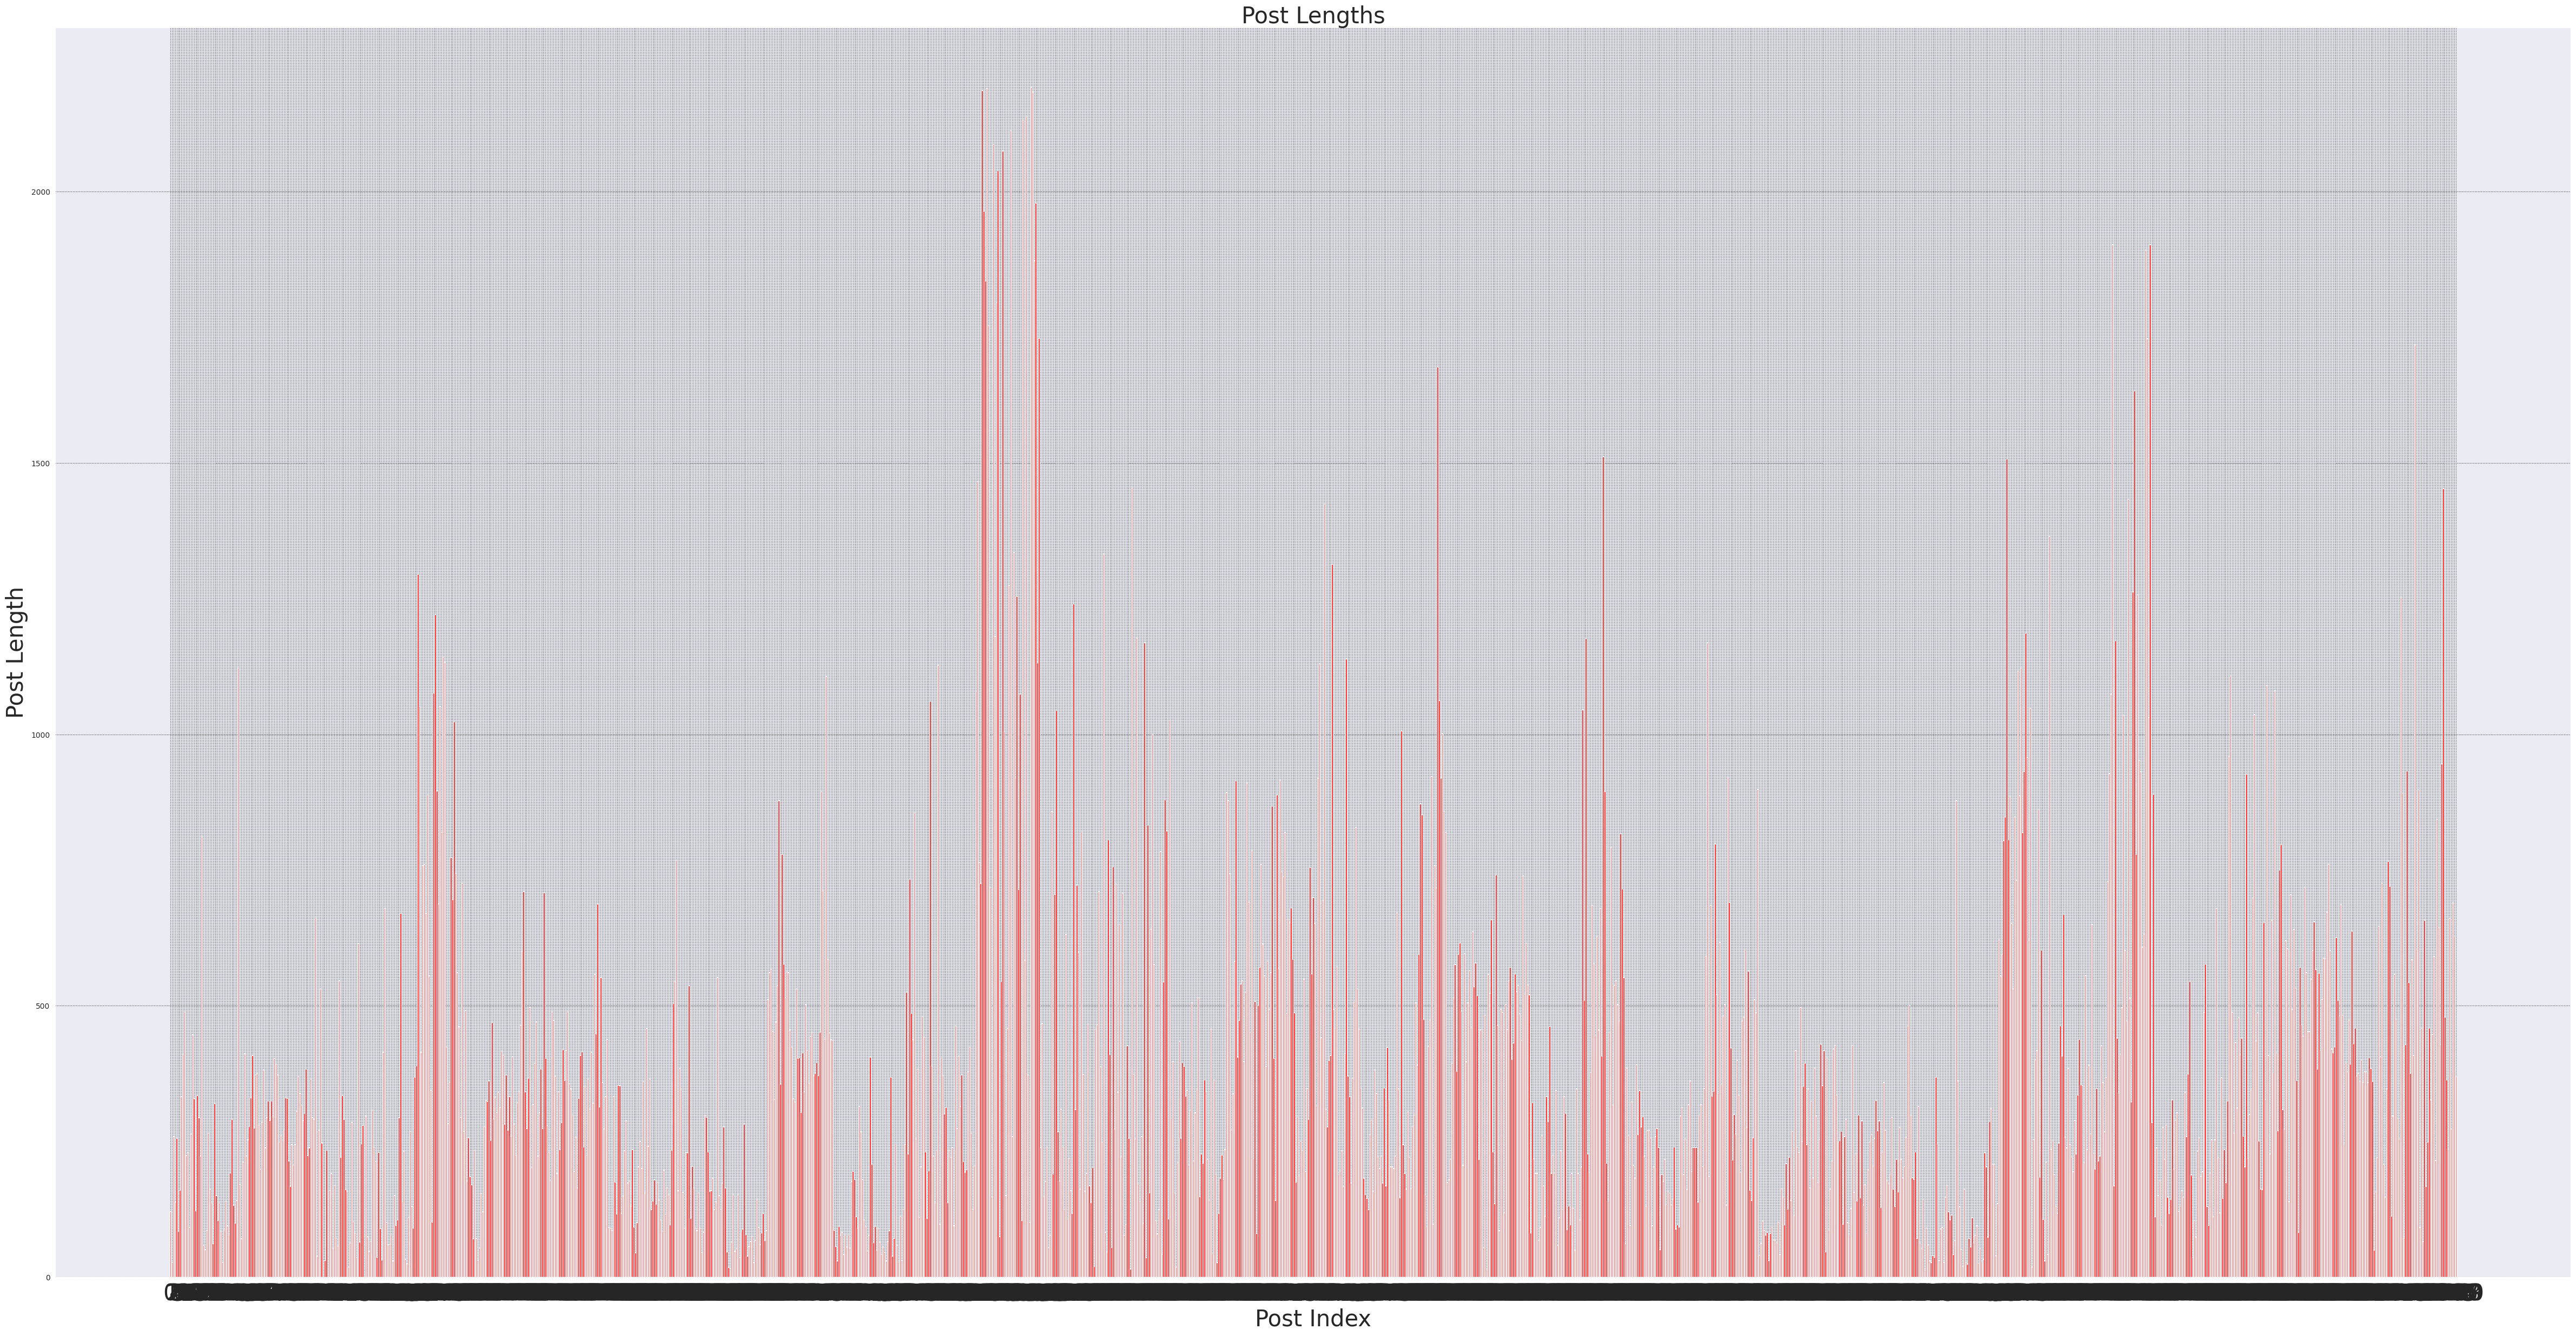

In [ ]:
# Count the length of each post
final_df['post_length'] = final_df['caption'].str.len()

# Plotting
plt.figure(figsize=(60, 30))
plt.bar(final_df.index, final_df['post_length'], color='red')
plt.xlabel('Post Index', fontsize=30)
plt.ylabel('Post Length', fontsize=30)
plt.title('Post Lengths', fontsize=30)
plt.xticks(final_df.index, fontsize=30)
plt.show()


In [ ]:

# Splitting rows into two separate rows
new_rows = []
for idx, row in final_df.iterrows():
    categories = row['category'].split(', ')
    for category in categories:
        new_row = {
            'description': row['caption'],
            'category': category,
            'post_length': row['post_length']
        }
        new_rows.append(new_row)

# Creating a new DataFrame from the split rows
new_df = pd.DataFrame(new_rows)
sorted_df = new_df.reset_index(drop=True)
sorted_df = sorted_df.reset_index(drop=True)
sorted_df.head(10)

,description,category,post_length
0,It’s our last Pizza Sunday at the arch today. ...,Promotions,121.0
1,It’s our last Pizza Sunday at the arch today. ...,Theme days,121.0
2,New cakes on our counters 😋😋,Promotions,28.0
3,New cakes on our counters 😋😋,Menu,28.0
4,🔺Opening Times for Half Term🔺: Hi everyone we ...,Reservations,259.0
5,"New addition to our selection of sandwiches, o...",Menu,138.0
6,We are currently closed as we move into our ne...,Notoriety,256.0
7,Weekend treats…\nIncluding the return of our “...,Notoriety,84.0
8,Weekend treats…\nIncluding the return of our “...,Promotions,84.0
9,Weekend treats…\nIncluding the return of our “...,Reservations,84.0


In [ ]:
sorted_df.to_csv('socialmedia.csv')

### Convert Dataset into LLM input Prompt

In [ ]:
INS = """[INST] As the social media manager for the restaurant, your task is to craft a compelling weekly post for the restaurant's Facebook and Instagram pages. Here are some guidelines to follow:

Your post should align with the specified input.
Incorporate 3-5 emojis, ensuring they are spaced out throughout the post. Avoid using more than one emoji every two sentences.
Limit the mention of menu items to a maximum of 1 or 2 products.
Maintain a tone that highlights the restaurant's strengths rather than focusing on direct marketing.
Include a Call to Action (CTA) that may include opening hours, address, telephone number, or WhatsApp number if available.
Mention the restaurant's online menu, accessible at www.restaurants.menu.
Optionally, include relevant hashtags at the end of the post using the '#' symbol.
"""

In [ ]:
for i in range(len(sorted_df)):
  input = sorted_df['category'][i]
  output = sorted_df['description'][i]
  prompt = f"""{INS} ### Input data:{input} ### Output:{output}"""
  sorted_df['description'].iloc[i] = prompt
sorted_df.head()
text_column = sorted_df['description']
df = pd.DataFrame(text_column)
df = df.rename(columns={'description': 'Text'})
df.head(10)

,Text
0,[INST] As the social media manager for the res...
1,[INST] As the social media manager for the res...
2,[INST] As the social media manager for the res...
3,[INST] As the social media manager for the res...
4,[INST] As the social media manager for the res...
5,[INST] As the social media manager for the res...
6,[INST] As the social media manager for the res...
7,[INST] As the social media manager for the res...
8,[INST] As the social media manager for the res...
9,[INST] As the social media manager for the res...


In [ ]:
import pandas as pd

# Set the display options to show more rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
# Display the first 20 rows of the DataFrame
df.head(10)

,Text
0,[INST] As the social media manager for the res...
1,[INST] As the social media manager for the res...
2,[INST] As the social media manager for the res...
3,[INST] As the social media manager for the res...
4,[INST] As the social media manager for the res...
5,[INST] As the social media manager for the res...
6,[INST] As the social media manager for the res...
7,[INST] As the social media manager for the res...
8,[INST] As the social media manager for the res...
9,[INST] As the social media manager for the res...


In [ ]:
df.shape

(2620, 1)

In [2]:
df=pd.read_csv('/content/social_media_prompt.csv')

In [3]:
import pandas as pd
# Set the display options to show more rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
# Display the first 20 rows of the DataFrame
df.head(10)

,Unnamed: 0,Text
0,0,[INST] As the social media manager for the res...
1,1,[INST] As the social media manager for the res...
2,2,[INST] As the social media manager for the res...
3,3,[INST] As the social media manager for the res...
4,4,[INST] As the social media manager for the res...
5,5,[INST] As the social media manager for the res...
6,6,[INST] As the social media manager for the res...
7,7,[INST] As the social media manager for the res...
8,8,[INST] As the social media manager for the res...
9,9,[INST] As the social media manager for the res...
